# Project-2: PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn

In [2]:
df = pd.read_csv("fertil2.csv")
df.head()

,index,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,0,5,64,24,1.0,1.0,1.0,1.0,12,0,...,NaN,576,1,12,0,0,0,1,0,0
1,1,1,56,32,1.0,1.0,1.0,1.0,13,3,...,12.0,1024,1,13,0,0,0,1,0,1
2,2,7,58,30,1.0,0.0,0.0,0.0,5,1,...,7.0,900,1,5,1,0,0,0,0,1
3,3,11,45,42,1.0,0.0,1.0,0.0,4,3,...,11.0,1764,1,4,0,0,0,0,0,1
4,4,5,45,43,1.0,1.0,1.0,1.0,11,2,...,14.0,1849,1,11,0,1,0,1,0,1


In [3]:
df.shape

(4361, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 28 columns):
index       4361 non-null int64
mnthborn    4361 non-null int64
yearborn    4361 non-null int64
age         4361 non-null int64
electric    4358 non-null float64
radio       4359 non-null float64
tv          4359 non-null float64
bicycle     4358 non-null float64
educ        4361 non-null int64
ceb         4361 non-null int64
agefbrth    3273 non-null float64
children    4361 non-null int64
knowmeth    4354 non-null float64
usemeth     4290 non-null float64
monthfm     2079 non-null float64
yearfm      2079 non-null float64
agefm       2079 non-null float64
idlnchld    4241 non-null float64
heduc       1956 non-null float64
agesq       4361 non-null int64
urban       4361 non-null int64
urb_educ    4361 non-null int64
spirit      4361 non-null int64
protest     4361 non-null int64
catholic    4361 non-null int64
frsthalf    4361 non-null int64
educ0       4361 non-null int64
everm

In [5]:
df.isna().sum()

index          0
mnthborn       0
yearborn       0
age            0
electric       3
radio          2
tv             2
bicycle        3
educ           0
ceb            0
agefbrth    1088
children       0
knowmeth       7
usemeth       71
monthfm     2282
yearfm      2282
agefm       2282
idlnchld     120
heduc       2405
agesq          0
urban          0
urb_educ       0
spirit         0
protest        0
catholic       0
frsthalf       0
educ0          0
evermarr       0
dtype: int64

In [6]:
df.isnull().sum().sum()

10547

In [7]:
df=df.fillna(df.median())

In [8]:
df.isnull().sum().sum()

0

In [9]:
#coverting into categories
df["electric"] = df["electric"].astype("category")
df["radio"] = df["radio"].astype("category")
df["tv"] = df["tv"].astype("category")
df["bicycle"] = df["bicycle"].astype("category")
df["knowmeth"] = df["knowmeth"].astype("category")
df["knowmeth"] = df["knowmeth"].astype("category")
df["usemeth"] = df["usemeth"].astype("category")
df["protest"] = df["protest"].astype("category")
df["catholic"] = df["catholic"].astype("category")
df["frsthalf"] = df["frsthalf"].astype("category")
df["educ0"] = df["educ0"].astype("category")
df["evermarr"] = df["evermarr"].astype("category")
df["spirit"] = df["spirit"].astype("category")

In [10]:
report_reg = pd.DataFrame(index = '0 1 2 3 4 5 6'.split(), columns='ModelName TrainScore TestScore MeanSquaredError RSquareScore'.split())

In [11]:
report_reg

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df["children"]
X = df.drop(["children", "ceb"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)



scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca_reg = PCA()
#train
pca_reg.fit(X_train)
#transform
X_train_pca = pca_reg.transform(X_train)
X_test_pca = pca_reg.transform(X_test)

In [14]:
X_train_pca.shape

(3488, 26)

In [15]:
pca_reg.n_components_

26

In [16]:
pca_reg.explained_variance_ratio_

array([1.62048792e-01, 1.29203181e-01, 1.08592905e-01, 1.06924683e-01,
       8.52921403e-02, 7.53785759e-02, 5.49471836e-02, 4.92093239e-02,
       4.74576276e-02, 4.25394408e-02, 3.46222241e-02, 1.77843463e-02,
       1.71553365e-02, 1.59157388e-02, 1.09902125e-02, 8.45205761e-03,
       7.37453774e-03, 6.96918991e-03, 5.44246257e-03, 4.76685106e-03,
       3.54199361e-03, 2.28954281e-03, 1.55938144e-03, 1.32884351e-03,
       2.02051795e-04, 1.13775874e-05])

In [17]:
pca_reg = PCA(n_components=0.95)
pca_reg.fit(X_train)
X_train_reduced = pca_reg.transform(X_train)
X_test_reduced = pca_reg.transform(X_test)

In [18]:
pca_reg.n_components_

15

In [19]:
pca_reg.explained_variance_

array([0.46670701, 0.37211033, 0.31275191, 0.30794737, 0.24564478,
       0.21709332, 0.15825009, 0.14172482, 0.13667987, 0.12251529,
       0.09971339, 0.05121963, 0.04940806, 0.04583796, 0.03165225])

# Regression


## Linear

In [20]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)

print("Train Score:%f" %lreg.score(X_train_reduced, y_train))
print("Test Score: %f" %lreg.score(X_test_reduced, y_test))
lreg_predictions=lreg.predict(X_test_reduced)

Train Score:0.607869
Test Score: 0.592093


In [21]:
from sklearn import metrics

In [22]:
print("Mean Squared error: ", metrics.mean_squared_error(y_test,lreg_predictions))

Mean Squared error:  1.9393829760578642


In [23]:
print("R-Square score: ", metrics.r2_score(y_test,lreg_predictions))

R-Square score:  0.5920934448490216


In [24]:
report_reg['ModelName']['0'] = 'Linear Regression'
report_reg['TrainScore']['0'] = lreg.score(X_train_reduced, y_train)
report_reg['TestScore']['0'] = lreg.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['0'] = metrics.mean_squared_error(y_test,lreg_predictions)
report_reg['RSquareScore']['0'] = metrics.r2_score(y_test,lreg_predictions)

## Ridge

In [25]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV 


param_grid = {'alpha' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10]}

ridge_grid= GridSearchCV(Ridge(), param_grid , verbose=3)

ridge_grid.fit(X_train_reduced,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.607, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.624, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.580, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.607, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.624, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.580, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ...........

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 1, 2, 3, 4, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
ridge_grid.best_params_

{'alpha': 3}

In [27]:
ridge_grid.best_estimator_

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [28]:
print("Train Score:%f" %ridge_grid.score(X_train_reduced, y_train))
print("Test Score: %f" %ridge_grid.score(X_test_reduced, y_test))

Train Score:0.607859
Test Score: 0.592394


Text(0.5, 1.0, 'Scatter Plot for Ridge Regression')

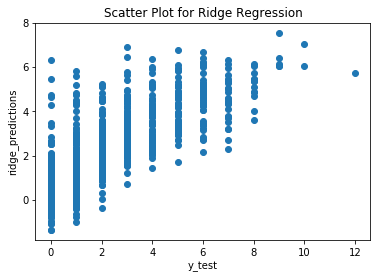

In [29]:
ridge_predictions=ridge_grid.predict(X_test_reduced)
plt.scatter(y_test, ridge_predictions)
plt.xlabel("y_test")
plt.ylabel("ridge_predictions")
plt.title("Scatter Plot for Ridge Regression")

In [30]:
print("Mean Squared error:", metrics.mean_squared_error(y_test,ridge_predictions))

Mean Squared error: 1.937955858705775


In [31]:
print("R-Square score:", metrics.r2_score(y_test,ridge_predictions))

R-Square score: 0.5923936075966962


In [32]:
report_reg['ModelName']['1'] = 'Ridge'
report_reg['TrainScore']['1'] = ridge_grid.score(X_train_reduced, y_train)
report_reg['TestScore']['1'] = ridge_grid.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['1'] = metrics.mean_squared_error(y_test,ridge_predictions)
report_reg['RSquareScore']['1'] = metrics.r2_score(y_test,ridge_predictions)

## Lasso

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 

param_grid = {'alpha' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10]}

lasso_grid= GridSearchCV(Lasso(), param_grid , verbose=3)

lasso_grid.fit(X_train_reduced,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.606, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.626, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.576, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.551, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.579, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.524, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ...........

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 1, 2, 3, 4, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [34]:
lasso_grid.best_params_

{'alpha': 0.01}

In [35]:
lasso_grid.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
print("Train Score:%f" %lasso_grid.score(X_train_reduced, y_train))
print("Test Score: %f" %lasso_grid.score(X_test_reduced, y_test))

Train Score:0.605350
Test Score: 0.592239


Text(0.5, 1.0, 'Scatter Plot for Lasso Regression')

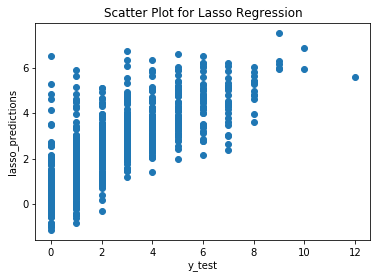

In [37]:
lasso_predictions=lasso_grid.predict(X_test_reduced)
plt.scatter(y_test,lasso_predictions)
plt.xlabel("y_test")
plt.ylabel("lasso_predictions")
plt.title("Scatter Plot for Lasso Regression")

In [38]:
print("Mean Squared error:", metrics.mean_squared_error(y_test,lasso_predictions))

Mean Squared error: 1.9386904362265207


In [39]:
print("R-Square score: ",metrics.r2_score(y_test,lasso_predictions))

R-Square score:  0.5922391053711544


In [40]:
report_reg['ModelName']['2'] = 'Lasso'
report_reg['TrainScore']['2'] = lasso_grid.score(X_train_reduced, y_train)
report_reg['TestScore']['2'] = lasso_grid.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['2'] = metrics.mean_squared_error(y_test,lasso_predictions)
report_reg['RSquareScore']['2'] = metrics.r2_score(y_test,lasso_predictions)

## Polynomial Regression

In [41]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')


grid= GridSearchCV(PolynomialFeatures(), param_grid )

poly_grid.fit(X_train_reduced,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                       

In [42]:
poly_grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [43]:
poly_grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [44]:
poly_predictions=poly_grid.predict(X_test_reduced)

print("Train Score:%f" %poly_grid.score(X_train_reduced, y_train))
print("Test Score: %f" %poly_grid.score(X_test_reduced, y_test))

Train Score:-1.647077
Test Score: -1.770685


In [45]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,poly_predictions))

Mean Squared Error:  1.7706849747292919


In [46]:
print("R-Square score: ", metrics.r2_score(y_test,poly_predictions))

R-Square score:  0.6275753591652273


In [47]:
report_reg['ModelName']['3'] = 'Polynomial Regression'
report_reg['TrainScore']['3'] = poly_grid.score(X_train_reduced, y_train)
report_reg['TestScore']['3'] = poly_grid.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['3'] = metrics.mean_squared_error(y_test,poly_predictions)
report_reg['RSquareScore']['3'] = metrics.r2_score(y_test,poly_predictions)

## Knn Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

knn_grid= GridSearchCV(KNeighborsRegressor(), param_grid )

knn_grid.fit(X_train_reduced,y_train)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
knn_grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [50]:
knn_grid.best_params_

{'n_neighbors': 10}

In [51]:
print("Train Score:%f" %knn_grid.score(X_train_reduced, y_train))
print("Test Score: %f" %knn_grid.score(X_test_reduced, y_test))
knn_predictions=knn_grid.predict(X_test_reduced)

Train Score:0.595222
Test Score: 0.510394


In [52]:
print("Mean Square Error: ", metrics.mean_squared_error(y_test,knn_predictions))

Mean Square Error:  2.327823596792669


In [53]:
print("R-Square Score: ", metrics.r2_score(y_test,knn_predictions))

R-Square Score:  0.5103935034549221


In [54]:
report_reg['ModelName']['4'] = 'KNN Regressor'
report_reg['TrainScore']['4'] = knn_grid.score(X_train_reduced, y_train)
report_reg['TestScore']['4'] = knn_grid.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['4'] = metrics.mean_squared_error(y_test,knn_predictions)
report_reg['RSquareScore']['4'] = metrics.r2_score(y_test,knn_predictions)

## Linear SVM Regression

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVR, LinearSVR
import matplotlib.gridspec as gridspec
import itertools


param_grid = {'C' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10,15,20,25,30,35,40,45,50]}

linear_svm_grid= GridSearchCV(LinearSVR(), param_grid , verbose=3)

linear_svm_grid.fit(X_train_reduced,y_train)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.523, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.561, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.521, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.603, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.623, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.573, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ...........

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.604, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.619, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.570, total=   0.1s
[CV] C=15 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=15, score=0.604, total=   0.1s
[CV] C=15 ............................................................
[CV] ................................ C=15, score=0.617, total=   0.1s
[CV] C=15 ............................................................
[CV] ................................ C=15, score=0.569, total=   0.1s
[CV] C=20 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=20, score=0.603, total=   0.1s
[CV] C=20 ............................................................
[CV] ................................ C=20, score=0.620, total=   0.1s
[CV] C=20 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=20, score=0.572, total=   0.1s
[CV] C=25 ............................................................
[CV] ................................ C=25, score=0.603, total=   0.1s
[CV] C=25 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=25, score=0.617, total=   0.1s
[CV] C=25 ............................................................
[CV] ................................ C=25, score=0.569, total=   0.1s
[CV] C=30 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=30, score=0.604, total=   0.2s
[CV] C=30 ............................................................
[CV] ................................ C=30, score=0.618, total=   0.2s
[CV] C=30 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=30, score=0.569, total=   0.2s
[CV] C=35 ............................................................
[CV] ................................ C=35, score=0.605, total=   0.2s
[CV] C=35 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=35, score=0.616, total=   0.2s
[CV] C=35 ............................................................
[CV] ................................ C=35, score=0.568, total=   0.2s
[CV] C=40 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=40, score=0.606, total=   0.2s
[CV] C=40 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=40, score=0.620, total=   0.2s
[CV] C=40 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=40, score=0.567, total=   0.2s
[CV] C=45 ............................................................
[CV] ................................ C=45, score=0.604, total=   0.2s
[CV] C=45 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=45, score=0.616, total=   0.2s
[CV] C=45 ............................................................
[CV] ................................ C=45, score=0.568, total=   0.2s
[CV] C=50 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=50, score=0.607, total=   0.2s
[CV] C=50 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=50, score=0.618, total=   0.2s
[CV] C=50 ............................................................
[CV] ................................ C=50, score=0.564, total=   0.2s


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.2, 0.3, 1, 2, 3, 4, 5, 10, 15, 20,
                               25, 30, 35, 40, 45, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [57]:
linear_svm_grid.best_estimator_

LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [58]:
linear_svm_grid.best_params_

{'C': 0.1}

In [59]:
print("Train Score:%f" %linear_svm_grid.score(X_train_reduced, y_train))
print("Test Score: %f" %linear_svm_grid.score(X_test_reduced, y_test))
linear_svm_predictions=linear_svm_grid.predict(X_test_reduced)

Train Score:0.602161
Test Score: 0.589345


In [60]:
print("Mean Square Error: ", metrics.mean_squared_error(y_test,linear_svm_predictions))

Mean Square Error:  1.9524521618471071


In [61]:
print("R-Square Score: ", metrics.r2_score(y_test,linear_svm_predictions))

R-Square Score:  0.5893446290556839


In [62]:
report_reg['ModelName']['5'] = 'Linear SVR'
report_reg['TrainScore']['5'] = linear_svm_grid.score(X_train_reduced, y_train)
report_reg['TestScore']['5'] = linear_svm_grid.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['5'] = metrics.mean_squared_error(y_test,linear_svm_predictions)
report_reg['RSquareScore']['5'] = metrics.r2_score(y_test,linear_svm_predictions)

## SVM with Kernel

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVR



svc = SVR(gamma = 0.01,C = 10, kernel = "rbf") # from grid search in project 1
    

svc.fit(X_train_reduced, y_train)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
print("Train Score:%f" %svc.score(X_train_reduced, y_train))
print("Test Score: %f" %svc.score(X_test_reduced, y_test))
svc_predictions=svc.predict(X_test_reduced)

Train Score:0.622418
Test Score: 0.604569


In [66]:
print("Mean Square Error: ", metrics.mean_squared_error(y_test,svc_predictions))

Mean Square Error:  1.8800703828299654


In [67]:
print("R-Square Score: ", metrics.r2_score(y_test,svc_predictions))

R-Square Score:  0.6045685443416664


In [68]:
report_reg['ModelName']['6'] = 'SVR with Kernel'
report_reg['TrainScore']['6'] = svc.score(X_train_reduced, y_train)
report_reg['TestScore']['6'] = svc.score(X_test_reduced, y_test)
report_reg['MeanSquaredError']['6'] = metrics.mean_squared_error(y_test,svc_predictions)
report_reg['RSquareScore']['6'] = metrics.r2_score(y_test,svc_predictions)

In [69]:
report_reg

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,Linear Regression,0.607869,0.592093,1.93938,0.592093
1,Ridge,0.607859,0.592394,1.93796,0.592394
2,Lasso,0.60535,0.592239,1.93869,0.592239
3,Polynomial Regression,-1.64708,-1.77068,1.77068,0.627575
4,KNN Regressor,0.595222,0.510394,2.32782,0.510394
5,Linear SVR,0.602161,0.589345,1.95245,0.589345
6,SVR with Kernel,0.622418,0.604569,1.88007,0.604569


In [70]:
report_old = pd.read_csv('report_reg_without_pca.csv')
report_old

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,Linear Regression,0.619389,6.072799e-01,258.188741,0.559559
1,Ridge,0.616189,6.062339e-01,162.541638,0.722722
2,Lasso,0.000000,-4.380000e-06,233.428216,0.601798
3,Polynomial Regression,0.686910,-1.210000e+17,0.546255,0.999068
4,KNN Regressor,0.613615,5.723814e-01,236.623098,0.596348
5,Linear SVR,0.612593,6.009281e-01,234.596498,0.599805
6,SVR with Kernel,0.620000,5.400000e-01,31.795844,0.945760


# Classfication

Before PCA

In [71]:
df = pd.read_csv("card.csv")

In [72]:
df.head()

,index,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,...,smsa,south,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper
0,0,2,0,0,7,29,NaN,NaN,158413,1,...,1,0,1,548,0,15.0,NaN,1.0,0.0,16
1,1,3,0,0,12,27,8.0,8.0,380166,1,...,1,0,1,481,0,35.0,93.0,1.0,1.0,9
2,2,4,0,0,12,34,14.0,12.0,367470,1,...,1,0,1,721,0,42.0,103.0,1.0,1.0,16
3,3,5,1,1,11,27,11.0,12.0,380166,1,...,1,0,1,250,0,25.0,88.0,1.0,1.0,10
4,4,6,1,1,12,34,8.0,7.0,367470,1,...,1,0,1,729,0,34.0,108.0,1.0,0.0,16


In [73]:
#coverting into categories
df["nearc2"] = df["nearc2"].astype("category")
df["nearc4"] = df["nearc4"].astype("category")
df["momdad14"] = df["momdad14"].astype("category")
df["sinmom14"] = df["sinmom14"].astype("category")
df["step14"] = df["step14"].astype("category")
df["reg661"] = df["reg661"].astype("category")
df["reg662"] = df["reg662"].astype("category")
df["reg663"] = df["reg663"].astype("category")
df["reg664"] = df["reg664"].astype("category")
df["reg665"] = df["reg665"].astype("category")
df["reg666"] = df["reg666"].astype("category")
df["reg667"] = df["reg667"].astype("category")
df["reg668"] = df["reg668"].astype("category")
df["reg669"] = df["reg669"].astype("category")
df["south66"] = df["south66"].astype("category")
df["black"] = df["black"].astype("category")
df["smsa"] = df["smsa"].astype("category")
df["south"] = df["south"].astype("category")
df["smsa66"] = df["smsa66"].astype("category")
df["enroll"] = df["enroll"].astype("category")
df["married"] = df["married"].astype("category")
df["libcrd14"] = df["libcrd14"].astype("category")

In [74]:
df.isnull().sum()

index         0
id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
dtype: int64

In [75]:
df=df.fillna(df.median())

#  KNN Classifier

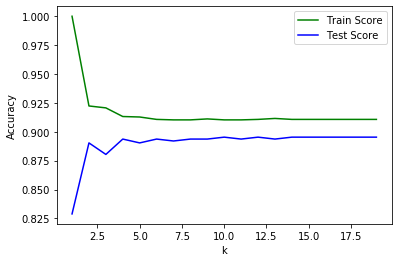

In [76]:
y = df["enroll"]
X = df.drop(["enroll"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

#step 2: scale
from sklearn.preprocessing import MinMaxScaler

# Here MinMax scaler is used to take into account of outlier values

scaler = MinMaxScaler()

scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

#step 3: train
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

#step 4: plot
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [77]:
#step 4 : Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=3)

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    print("Cross-validation scores:\n{}".format(cross_val_score(knn, X, y, cv=kfold)))
    


Cross-validation scores:
[0.85458167 0.79262213 0.82652044]
Cross-validation scores:
[0.89243028 0.90428714 0.889332  ]
Cross-validation scores:
[0.88844622 0.889332   0.87238285]
Cross-validation scores:
[0.89840637 0.90528415 0.90528415]
Cross-validation scores:
[0.89442231 0.90229312 0.90428714]
Cross-validation scores:
[0.90537849 0.90528415 0.90528415]
Cross-validation scores:
[0.90537849 0.90428714 0.90428714]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.91226321 0.90528415]
Cross-validation scores:
[0.90537849 0.9

# Decision Tree Classifier

In [78]:
#step 3: train and plot
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

#Step 4: Grid search to find best parameters
best_score = 0

for max_depth in [2, 3, 4, 5, 6]:
    dtree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    dtree.fit(X_train, y_train)
    score = dtree.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'max_depth': max_depth}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Accuracy on training set: 1.000
Accuracy on test set: 0.836
Best score: 0.90
Best parameters: {'max_depth': 2}


In [79]:
# Here best score on test is found at max_depth of 5

In [80]:
#step 4 : Cross-Validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree, X, y, cv=kfold)))    

Cross-validation scores:
[0.90039841 0.90827517 0.90229312]


# Logistic Regression

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

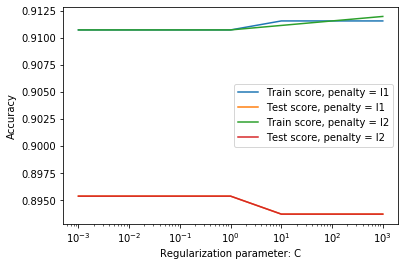

In [81]:
#step 1: split dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#step 3: train and plot
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))


%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [82]:
#step 4 : Cross-Validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
logreg = LogisticRegression(C = 1000)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))  

Cross-validation scores:
[0.90537849 0.91226321 0.90528415]


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Linear SVC

In [83]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

## Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [84]:
from sklearn.model_selection import GridSearchCV

lsvc = LinearSVC(max_iter = 100000)
param_grid = {'C' : (0.001,0.01, 0.1, 1, 10, 100)}
grid_search = GridSearchCV(lsvc, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=100000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [85]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.9105


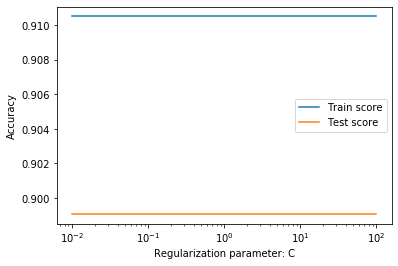

In [86]:
c_range = [0.01,0.1,1,10,100]

train_score = []
test_score = []
for c in c_range:
    lsvc = LinearSVC(C= c, max_iter = 100000)
    lsvc.fit(X_train,y_train)
    train_score.append(lsvc.score(X_train, y_train))
    test_score.append(lsvc.score(X_test, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Kernel SVC

In [87]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
## grid Search

svm = SVC(kernel = 'rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [90]:
print("Best parameters for scaled: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters for scaled: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.9105


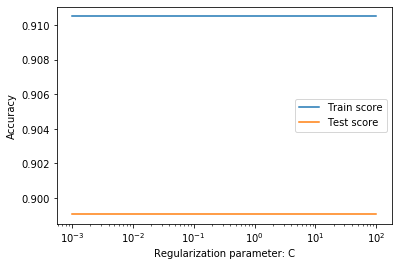

In [91]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []
for c in c_range:
        svm = SVC(C=c, gamma = 0.01)
        svm.fit(X_train,y_train)
        train_score.append(svm.score(X_train, y_train))
        test_score.append(svm.score(X_test, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# PCA

In [93]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
y = df["enroll"]
X = df.drop(["enroll"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

pca_reg = PCA()
#train
pca_reg.fit(X_train)
#transform
X_train_pca = pca_reg.transform(X_train)
X_test_pca = pca_reg.transform(X_test)

In [94]:
X_train_pca.shape

(2408, 32)

In [95]:
pca_reg.n_components_

32

In [96]:
pca_reg.explained_variance_ratio_

array([1.93865472e-01, 7.90848790e-02, 7.06768351e-02, 6.10776446e-02,
       5.14685645e-02, 4.83975407e-02, 4.23385117e-02, 3.90321158e-02,
       3.77011215e-02, 3.47338699e-02, 3.37119393e-02, 3.27498015e-02,
       3.07035555e-02, 2.75325919e-02, 2.72794404e-02, 2.62627302e-02,
       2.25877883e-02, 2.12586543e-02, 2.06051107e-02, 1.90572642e-02,
       1.71133198e-02, 1.44054197e-02, 1.27146074e-02, 1.03596198e-02,
       9.26579798e-03, 6.60055006e-03, 5.94173924e-03, 3.47112921e-03,
       2.38562940e-06, 3.82332229e-32, 2.42178626e-33, 1.11046579e-33])

In [97]:
pca_reg = PCA(n_components=0.95)
pca_reg.fit(X_train)
X_train_reduced = pca_reg.transform(X_train)
X_test_reduced = pca_reg.transform(X_test)

In [98]:
pca_reg.n_components_

22

In [99]:
pca_reg.explained_variance_

array([6.20627246, 2.53176753, 2.26259834, 1.95529663, 1.64767832,
       1.54936473, 1.35539524, 1.24954662, 1.20693711, 1.11194561,
       1.07923024, 1.04842904, 0.98292197, 0.88140897, 0.87330476,
       0.84075652, 0.72310952, 0.68055956, 0.65963748, 0.61008581,
       0.54785375, 0.46116495])

# KNN Classification

In [100]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

knn_c_grid= GridSearchCV(KNeighborsClassifier(), param_grid )
knn_c_grid.fit(X_train_reduced,y_train)
knn_c_grid_predictions = knn_c_grid.predict(X_test_reduced)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [101]:
knn_c_grid.best_params_

{'n_neighbors': 8}

In [102]:
knn_c_grid_predictions = knn_c_grid.predict(X_test_reduced)

print("Confusion Matrix is: ")
print(confusion_matrix(y_test,knn_c_grid_predictions))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [103]:
print("Classification Report is: ")
print(classification_report(y_test,knn_c_grid_predictions))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear SVC

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
%matplotlib inline
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools



param_grid = {'C' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10]}

linear_svc_grid= GridSearchCV(LinearSVC(), param_grid , verbose=3)

linear_svc_grid.fit(X_train_reduced,y_train)

linear_svc_grid_predictions = linear_svc_grid.predict(X_test_reduced)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.910, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.910, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.911, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.910, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.910, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.911, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ...........

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.910, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.911, total=   0.1s
[CV] C=2 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=2, score=0.910, total=   0.1s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.910, total=   0.1s
[CV] C=2 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=2, score=0.911, total=   0.2s
[CV] C=3 .............................................................
[CV] ................................. C=3, score=0.910, total=   0.1s
[CV] C=3 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=3, score=0.910, total=   0.3s
[CV] C=3 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=3, score=0.911, total=   0.3s
[CV] C=4 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=4, score=0.910, total=   0.4s
[CV] C=4 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=4, score=0.910, total=   0.4s
[CV] C=4 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=4, score=0.911, total=   0.4s
[CV] C=5 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=0.910, total=   0.4s
[CV] C=5 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=0.910, total=   0.4s
[CV] C=5 .............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=0.911, total=   0.3s
[CV] C=10 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.910, total=   0.3s
[CV] C=10 ............................................................


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.910, total=   0.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.911, total=   0.3s


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.3s finished


In [106]:
linear_svc_grid_predictions = linear_svc_grid.predict(X_test_reduced)

print("Confusion Matrix is: ")
print(confusion_matrix(y_test,linear_svc_grid_predictions))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [107]:
print("Classification Report is: ")
print(classification_report(y_test,linear_svc_grid_predictions))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM with Kernel

In [108]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

param_grid = {'C' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10] , 'gamma' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10]}

svc= GridSearchCV(SVC(kernel = 'rbf' ), param_grid , verbose=3)

svc.fit(X_train_reduced, y_train)

svc_grid_predictions=svc.predict(X_test_reduced)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.910, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.910, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.911, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.910, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.910, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.911, total=   0.1s
[CV] C=0.01, gamma=0.2 ...............................................
[CV] .........

[CV] ..................... C=0.1, gamma=10, score=0.910, total=   0.5s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.910, total=   0.5s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.911, total=   0.5s
[CV] C=0.2, gamma=0.01 ...............................................
[CV] ................... C=0.2, gamma=0.01, score=0.910, total=   0.1s
[CV] C=0.2, gamma=0.01 ...............................................
[CV] ................... C=0.2, gamma=0.01, score=0.910, total=   0.2s
[CV] C=0.2, gamma=0.01 ...............................................
[CV] ................... C=0.2, gamma=0.01, score=0.911, total=   0.2s
[CV] C=0.2, gamma=0.1 ................................................
[CV] .................... C=0.2, gamma=0.1, score=0.910, total=   0.2s
[CV] C=0.2, gamma=0.1 ................................................
[CV] .

[CV] ...................... C=0.3, gamma=5, score=0.910, total=   0.4s
[CV] C=0.3, gamma=5 ..................................................
[CV] ...................... C=0.3, gamma=5, score=0.911, total=   0.4s
[CV] C=0.3, gamma=10 .................................................
[CV] ..................... C=0.3, gamma=10, score=0.910, total=   0.5s
[CV] C=0.3, gamma=10 .................................................
[CV] ..................... C=0.3, gamma=10, score=0.910, total=   0.6s
[CV] C=0.3, gamma=10 .................................................
[CV] ..................... C=0.3, gamma=10, score=0.911, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.910, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.910, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ........................ C=2, gamma=4, score=0.911, total=   0.4s
[CV] C=2, gamma=5 ....................................................
[CV] ........................ C=2, gamma=5, score=0.910, total=   0.2s
[CV] C=2, gamma=5 ....................................................
[CV] ........................ C=2, gamma=5, score=0.910, total=   0.2s
[CV] C=2, gamma=5 ....................................................
[CV] ........................ C=2, gamma=5, score=0.911, total=   0.2s
[CV] C=2, gamma=10 ...................................................
[CV] ....................... C=2, gamma=10, score=0.910, total=   0.3s
[CV] C=2, gamma=10 ...................................................
[CV] ....................... C=2, gamma=10, score=0.910, total=   0.3s
[CV] C=2, gamma=10 ...................................................
[CV] ....................... C=2, gamma=10, score=0.911, total=   0.2s
[CV] C=3, gamma=0.01 .................................................
[CV] .

[CV] ........................ C=4, gamma=4, score=0.910, total=   0.4s
[CV] C=4, gamma=4 ....................................................
[CV] ........................ C=4, gamma=4, score=0.910, total=   0.4s
[CV] C=4, gamma=4 ....................................................
[CV] ........................ C=4, gamma=4, score=0.911, total=   0.4s
[CV] C=4, gamma=5 ....................................................
[CV] ........................ C=4, gamma=5, score=0.910, total=   0.4s
[CV] C=4, gamma=5 ....................................................
[CV] ........................ C=4, gamma=5, score=0.910, total=   0.4s
[CV] C=4, gamma=5 ....................................................
[CV] ........................ C=4, gamma=5, score=0.911, total=   0.4s
[CV] C=4, gamma=10 ...................................................
[CV] ....................... C=4, gamma=10, score=0.910, total=   0.6s
[CV] C=4, gamma=10 ...................................................
[CV] .

[CV] ....................... C=10, gamma=3, score=0.911, total=   0.2s
[CV] C=10, gamma=4 ...................................................
[CV] ....................... C=10, gamma=4, score=0.910, total=   0.2s
[CV] C=10, gamma=4 ...................................................
[CV] ....................... C=10, gamma=4, score=0.910, total=   0.4s
[CV] C=10, gamma=4 ...................................................
[CV] ....................... C=10, gamma=4, score=0.911, total=   0.4s
[CV] C=10, gamma=5 ...................................................
[CV] ....................... C=10, gamma=5, score=0.910, total=   0.4s
[CV] C=10, gamma=5 ...................................................
[CV] ....................... C=10, gamma=5, score=0.910, total=   0.4s
[CV] C=10, gamma=5 ...................................................
[CV] ....................... C=10, gamma=5, score=0.911, total=   0.4s
[CV] C=10, gamma=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.5min finished


In [109]:
svc.best_params_

{'C': 0.01, 'gamma': 0.01}

In [110]:
svc.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test,svc_grid_predictions))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [112]:
print("Classification Report is: ")
print(classification_report(y_test,svc_grid_predictions))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [113]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.gridspec as gridspec
import itertools



param_grid = {'C' : [0.01,0.1,0.2,0.3,1,2,3,4,5,10] , 'penalty' : ['l1' , 'l2']}

logit_grid= GridSearchCV(LogisticRegression(), param_grid , verbose=3)

logit_grid.fit(X_train_reduced,y_train)

logit_grid_predictions = logit_grid.predict(X_test_reduced)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] .................. C=0.01, penalty=l1, score=0.910, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .................. C=0.01, penalty=l1, score=0.910, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .................. C=0.01, penalty=l1, score=0.911, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.910, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.910, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.911, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...........

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

[CV] ..................... C=2, penalty=l1, score=0.910, total=   0.0s
[CV] C=2, penalty=l1 .................................................
[CV] ..................... C=2, penalty=l1, score=0.911, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.912, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.910, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.911, total=   0.0s
[CV] C=3, penalty=l1 .................................................
[CV] ..................... C=3, penalty=l1, score=0.912, total=   0.0s
[CV] C=3, penalty=l1 .................................................
[CV] ..................... C=3, penalty=l1, score=0.910, total=   0.0s
[CV] C=3, penalty=l1 .................................................
[CV] .

In [114]:
logit_grid.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [115]:
logit_grid.best_estimator_

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test,logit_grid_predictions))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [117]:
print("Classification Report is: ")
print(classification_report(y_test,logit_grid_predictions))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
%matplotlib notebook

param_grid = {'max_depth' : [1, 2, 3, 5, 10]}

dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid , verbose=3)

dtree.fit(X_train_reduced, y_train)

dtree_grid_predictions = dtree.predict(X_test_reduced)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.910, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.910, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.911, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.907, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.910, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.910, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [120]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.911
Accuracy on test set: 0.895


In [121]:
print("Best params: {}".format(dtree.best_params_))

Best params: {'max_depth': 1}


In [122]:
print("Best Score: {}".format(dtree.best_score_))

Best Score: 0.9107142857142857


In [123]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test,dtree_grid_predictions))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [124]:
print("Classification Report is: ")
print(classification_report(y_test,dtree_grid_predictions))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
